# Unstructured network (full spiking simulation)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys

from ntwk import SoftmaxNtwk
from disp import set_plot

In [2]:
t_max = 201
t = np.arange(t_max)

D = 16
N = 2000  # takes about 8 GB of RAM

t_u = 101  # when to give input
us = {t_u: (np.arange(D) < 2).astype(float)}  # applied to tunings 0 and 1

In [3]:
MU_J = np.zeros((D, D))
SGM_J = np.ones((D, D))

xs_all = []
ys_all = []


J = np.nan*np.zeros((D, D, N, N))

for d_to in range(D):
    for d_from in range(D):
        J[d_to, d_from, :, :] = SGM_J[d_to, d_from]*np.sqrt(D/N)*np.random.randn(N, N) + MU_J[d_to, d_from]*D/N

ntwk = SoftmaxNtwk(J)

u_ptb = np.zeros((N, D))
u_ptb[:, np.arange(D) < 2] = 1
us_full = {t_u: u_ptb}

x_0 = np.random.randn(N, D)
g = np.inf
t, xs, ys = ntwk.run(g=g, t_max=t_max, x_0=x_0, us=us_full, progress=10)

....................

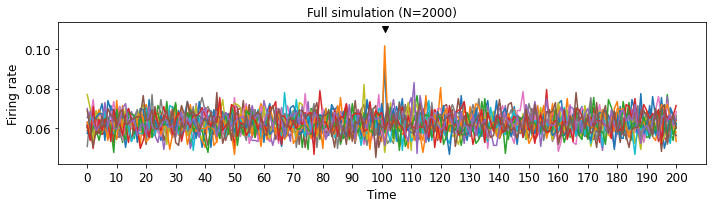

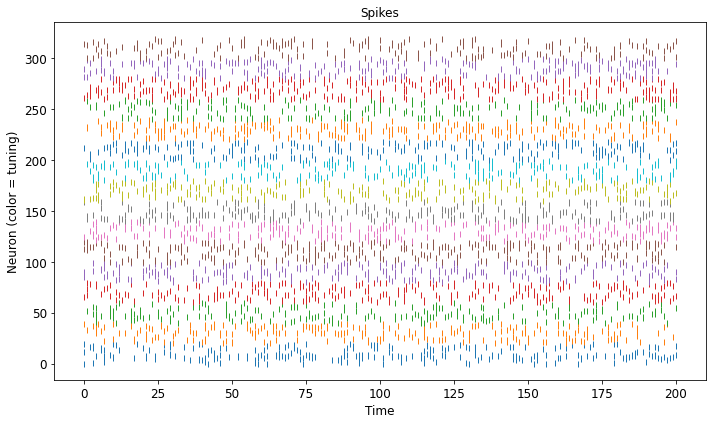

In [4]:
# firing rates
fig, ax = plt.subplots(1, 1, figsize=(10, 3), tight_layout=True, sharex=True)
ths = ys.mean(1)

ax.plot(ths)
ax.scatter(t_u, .11, marker='v', c='k')

ax.set_xlabel('Time')
set_plot(ax, x_ticks=np.arange(0, t_max, 10), y_label='Firing rate', title=f'Full simulation (N={N})')

# spikes
fig, ax = plt.subplots(1, 1, figsize=(10, 6), tight_layout=True, sharex=True)
nplot_cotuned = 20

for d in range(D):
    inrns = np.random.permutation(N)[:nplot_cotuned]
    tspks, cspks = ys[:, inrns, d].nonzero()
    
    ax.scatter(tspks, cspks+d*nplot_cotuned, marker='|', lw=1)
    
set_plot(ax, x_label='Time', y_label='Neuron (color = tuning)', title='Spikes')